In [24]:
!pip install sqlalchemy
!pip install pyodbc

In [25]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.utils import resample
from scipy.stats import sem, t

In [26]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [27]:
# For Windows authentication
# Replace the server argument with the Server Name found when logging into SQL Server Management Studio 
# OR
# For SQL Server authentication
# Replace the server, user and password argument with the Server Name, username and password
engine = new_engine('mssql', 'MAYA', 'AdventureWorks2022', integrated_security=True)

mssql://MAYA/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [28]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [29]:
connection = engine.connect()

In [30]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [31]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [32]:
sql_query = """
SELECT D.GroupName AS DepartmentGroup
    , COUNT(*) AS Employees
FROM HumanResources.Employee AS E
    INNER JOIN HumanResources.EmployeeDepartmentHistory AS H
        ON E.BusinessEntityID = H.BusinessEntityID
    INNER JOIN HumanResources.Department AS D
        ON H.DepartmentID = D.DepartmentID
GROUP BY D.GroupName
ORDER BY 2;
"""

da = pd.read_sql(sql_query, con=connection)
display(da)

,DepartmentGroup,Employees
0,Quality Assurance,12
1,Research and Development,15
2,Inventory Management,19
3,Sales and Marketing,28
4,Executive General and Administration,36
5,Manufacturing,186


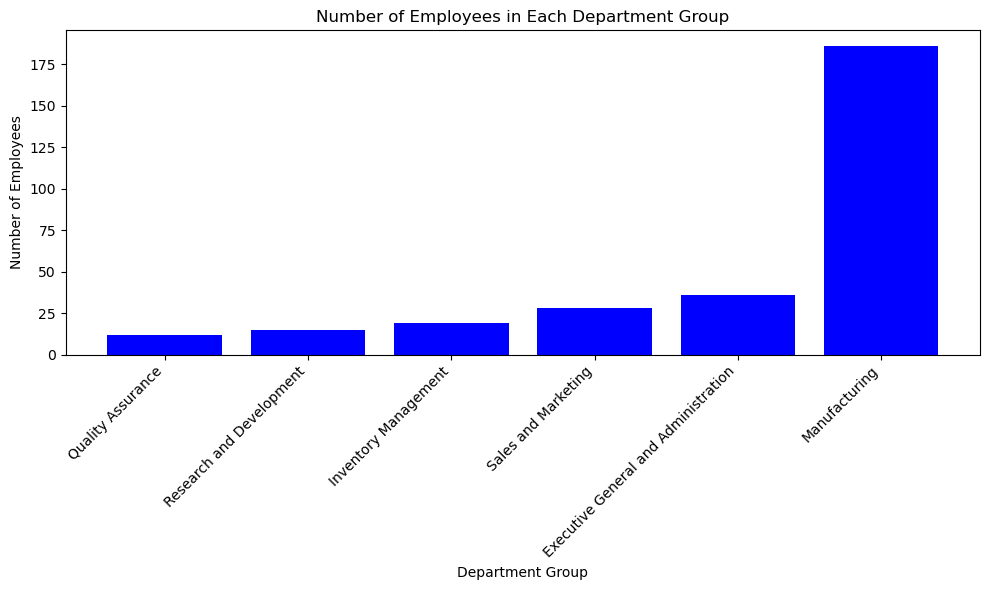

In [33]:
sql_query = """
SELECT D.GroupName AS DepartmentGroup
    , COUNT(*) AS Employees
FROM HumanResources.Employee AS E
    INNER JOIN HumanResources.EmployeeDepartmentHistory AS H
        ON E.BusinessEntityID = H.BusinessEntityID
    INNER JOIN HumanResources.Department AS D
        ON H.DepartmentID = D.DepartmentID
GROUP BY D.GroupName
ORDER BY 2;
"""

# Läs data från SQL Server till en DataFrame
da = pd.read_sql(sql_query, con=connection)

# Skapa ett stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(da['DepartmentGroup'], da['Employees'], color='blue')
plt.xlabel('Department Group')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Department Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Visa diagrammet
plt.show()


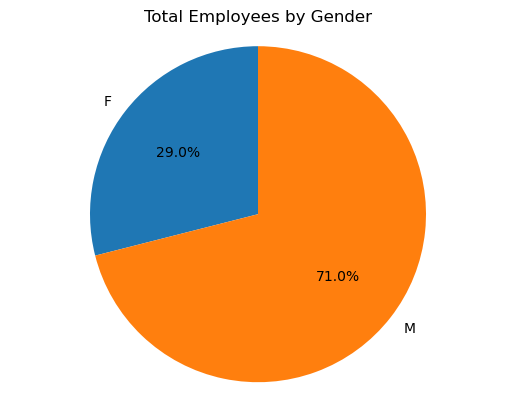

,Gender,Total
0,F,84
1,M,206


In [36]:
sql_query2 = """
    SELECT Gender, COUNT(*) as Total
    FROM HumanResources.Employee
    GROUP BY Gender
"""

# Läs in resultaten från SQL-frågan till en Pandas DataFrame
df = pd.read_sql_query(sql_query, con=engine)


# Skapa ett cirkeldiagram
plt.pie(df['Total'], labels=df['Gender'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # För att säkerställa att cirkeldiagrammet är proportionellt
plt.title('Total Employees by Gender')
plt.show()

da = pd.read_sql(sql_query2, con=connection)
display(da)

,TotalSickLeaveHours,AVGSickLeaveHours,TotalVacationHours,AVGVacationHours,Gender
0,3844,45,4375,52,F
1,9295,45,10303,50,M


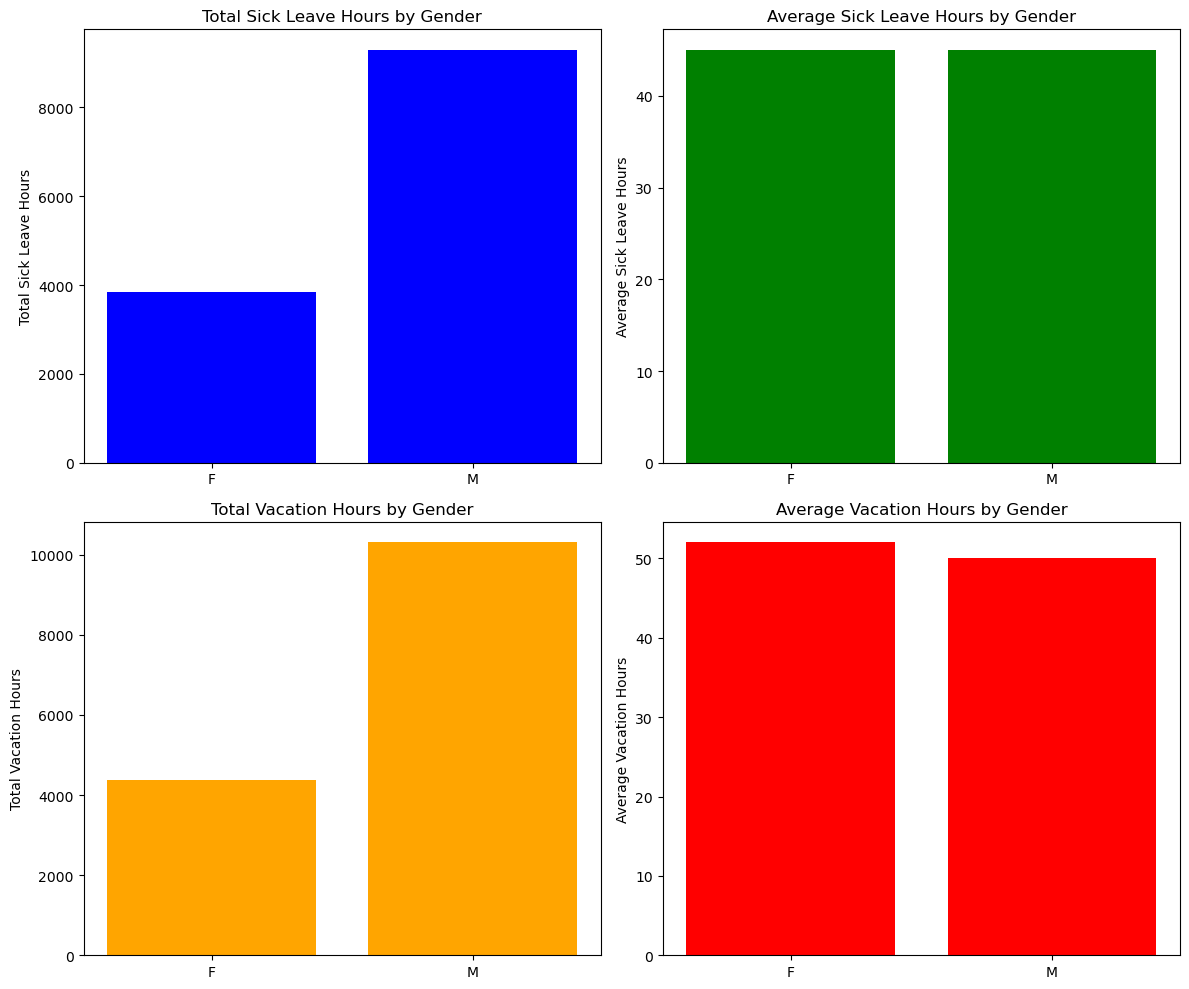

In [37]:
sql_query3 = """

SELECT SUM(SickLeaveHours) AS TotalSickLeaveHours
      ,AVG(SickLeaveHours) AS AVGSickLeaveHours
	  ,SUM(VacationHours) AS TotalVacationHours
	  ,AVG(VacationHours) AS AVGVacationHours
	  ,Gender
FROM HumanResources.Employee
GROUP BY Gender

"""
da = pd.read_sql(sql_query3, con=connection)
display(da)

# Skapa fyra stapeldiagram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Stapeldiagram för TotalSickLeaveHours
axes[0, 0].bar(da['Gender'], da['TotalSickLeaveHours'], color='blue')
axes[0, 0].set_ylabel('Total Sick Leave Hours')
axes[0, 0].set_title('Total Sick Leave Hours by Gender')

# Stapeldiagram för AVGSickLeaveHours
axes[0, 1].bar(da['Gender'], da['AVGSickLeaveHours'], color='green')
axes[0, 1].set_ylabel('Average Sick Leave Hours')
axes[0, 1].set_title('Average Sick Leave Hours by Gender')

# Stapeldiagram för TotalVacationHours
axes[1, 0].bar(da['Gender'], da['TotalVacationHours'], color='orange')
axes[1, 0].set_ylabel('Total Vacation Hours')
axes[1, 0].set_title('Total Vacation Hours by Gender')

# Stapeldiagram för AVGVacationHours
axes[1, 1].bar(da['Gender'], da['AVGVacationHours'], color='red')
axes[1, 1].set_ylabel('Average Vacation Hours')
axes[1, 1].set_title('Average Vacation Hours by Gender')


plt.tight_layout()


plt.show()


In [38]:

sql_query4 = """

SELECT TOP 10 
        BusinessEntityID
	  , FirstName
      , MiddleName
      , LastName
FROM Person.Person
ORDER BY NEWID();


"""
da = pd.read_sql(sql_query4, con=connection)
display(da)

,BusinessEntityID,FirstName,MiddleName,LastName
0,16174,Molly,None,Perez
1,5288,Eric,A,Patterson
2,11010,Joe,M,Schmidt
3,5930,Autumn,I,Xu
4,18301,Alexander,D,White
5,2072,Tom,None,Youtsey
6,3746,Edward,None,Campbell
7,2377,Susan,None,Metters
8,4893,Martha,M,Li
9,15958,Henry,None,Vance


In [39]:
sql_query5 = """

SELECT BusinessEntityID
   ,JobTitle
   ,BirthDate
   ,Gender
   ,VacationHours
   ,SickLeaveHours

FROM HumanResources . Employee
"""
da = pd.read_sql(sql_query5, con=connection)
display(da)

,BusinessEntityID,JobTitle,BirthDate,Gender,VacationHours,SickLeaveHours
0,1,Chief Executive Officer,1969-01-29,M,99,69
1,2,Vice President of Engineering,1971-08-01,F,1,20
2,3,Engineering Manager,1974-11-12,M,2,21
3,4,Senior Tool Designer,1974-12-23,M,48,80
4,5,Design Engineer,1952-09-27,F,5,22
...,...,...,...,...,...,...
285,286,Sales Representative,1977-02-14,F,36,38
286,287,European Sales Manager,1957-09-20,F,21,30
287,288,Sales Representative,1975-07-09,F,35,37
288,289,Sales Representative,1968-03-17,F,37,38


In [40]:
sql_query6 = """
SELECT COUNT(BusinessEntityID) AS Numbe
    ,Gender
	,COUNT(BusinessEntityID)/290.0*100 AS Percentage
FROM HumanResources.Employee
GROUP BY Gender
"""
da = pd.read_sql(sql_query6, con=connection)
display(da)

,Numbe,Gender,Percentage
0,84,F,28.9655
1,206,M,71.0344


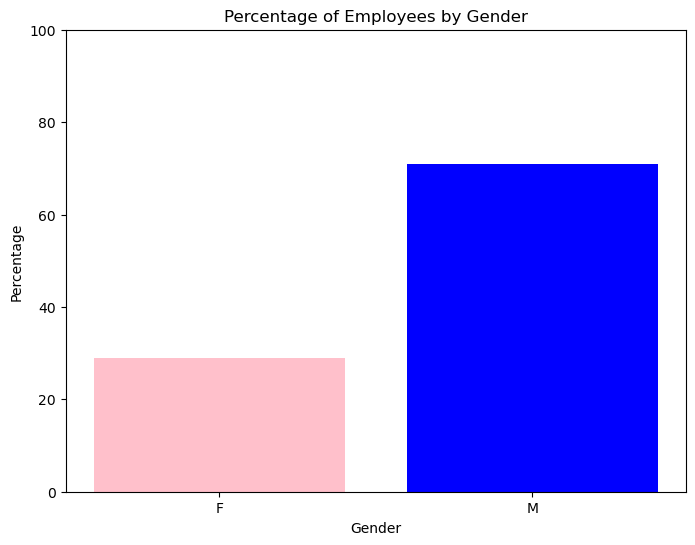

In [41]:
# Skapa ett stapeldiagram
plt.figure(figsize=(8, 6))
plt.bar(da['Gender'], da['Percentage'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Employees by Gender')
plt.ylim(0, 100)  # Ange y-axeln till 0-100%
plt.show()


,BusinessEntityID,SickLeaveHours,VacationHours,Gender
0,4,80,48,M
1,1,69,99,M
2,88,69,99,F
3,117,69,99,M
4,92,69,98,M
5,116,69,98,M
6,124,69,98,F
7,90,68,97,F
8,114,68,97,M
9,122,68,97,F


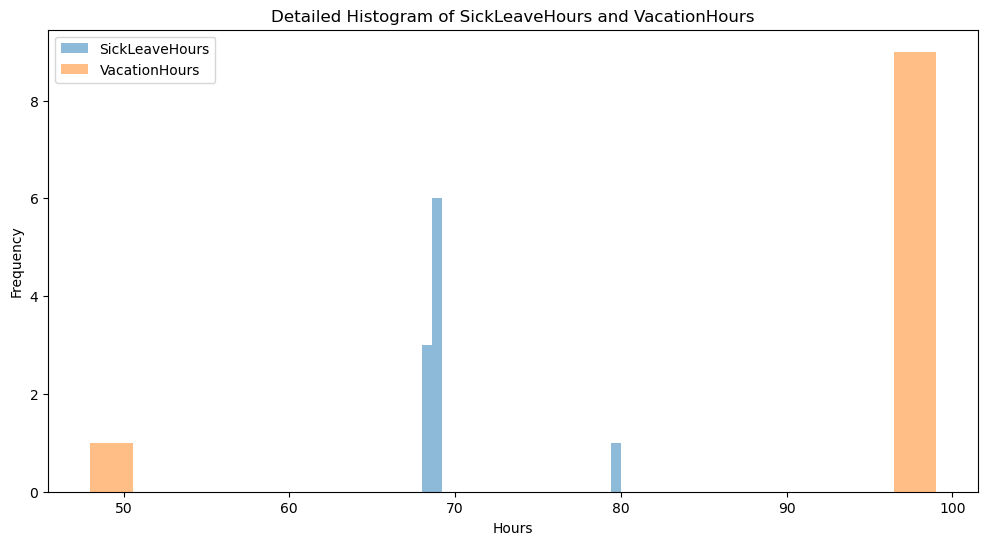

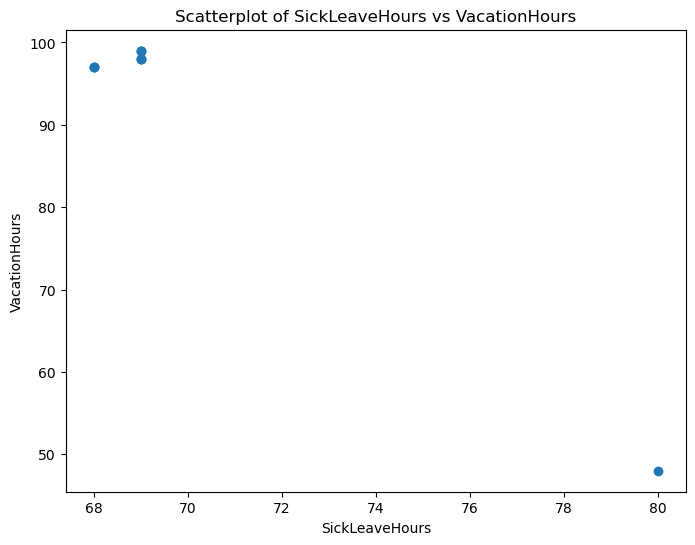

In [57]:
sql_query7 = """
SELECT TOP 10
    BusinessEntityID,
    SickLeaveHours,
    VacationHours,
    Gender
FROM
    HumanResources.Employee
ORDER BY
    SickLeaveHours DESC, VacationHours DESC;
"""
da = pd.read_sql(sql_query7, con=connection)
display(da)

# Histogram för SickLeaveHours och VacationHours
plt.figure(figsize=(12, 6))
plt.hist(da['SickLeaveHours'], bins=20, alpha=0.5, label='SickLeaveHours')
plt.hist(da['VacationHours'], bins=20, alpha=0.5, label='VacationHours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend()
plt.title('Detailed Histogram of SickLeaveHours and VacationHours')
plt.show()

# Scatterplot för SickLeaveHours vs VacationHours
plt.figure(figsize=(8, 6))
plt.scatter(da['SickLeaveHours'], da['VacationHours'])
plt.xlabel('SickLeaveHours')
plt.ylabel('VacationHours')
plt.title('Scatterplot of SickLeaveHours vs VacationHours')
plt.show()

